# Importing Libraries

In [19]:
from sklearn.tree import DecisionTreeClassifier
import numpy as np
import os
import sklearn.metrics
import matplotlib.pyplot as plt
import tsfel
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Question-1

In [20]:
X_train = np.load('../SavedDataset/Raw/X_train.npy')
y_train = np.load('../SavedDataset/Raw/y_train.npy')

X_test = np.load('../SavedDataset/Raw/X_test.npy')
y_test  = np.load('../SavedDataset/Raw/y_test.npy')

print(f"X_train: {X_train.shape}")
print(f"X_test: {X_test.shape}")
print(f"y_train: {y_train.shape}")
print(f"y_test: {y_test.shape}")

X_train: (126, 500, 3)
X_test: (54, 500, 3)
y_train: (126,)
y_test: (54,)


## Approach-1: Reshaping X_train from shape (126,500,3) to (126,1500)

In [21]:
x_train=np.hstack((X_train[:,:,0],X_train[:,:,1],X_train[:,:,2]))
x_test=np.hstack((X_test[:,:,0],X_test[:,:,1],X_test[:,:,2]))

print(f"x_train: {x_train.shape}")
print(f"x_test: {x_test.shape}")
print(f"y_train: {y_train.shape}")
print(f"y_test: {y_test.shape}")

x_train: (126, 1500)
x_test: (54, 1500)
y_train: (126,)
y_test: (54,)


In [22]:
y_pred=[]
accuracy=[]
for i in range(2,9):
    dt=DecisionTreeClassifier(max_depth=i,random_state=0)
    dt.fit(x_train,y_train)
    yp=dt.predict(x_test)
    y_pred.append(yp)
    accuracy.append(sklearn.metrics.accuracy_score(y_test, yp))

Text(0, 0.5, 'Accuracy')

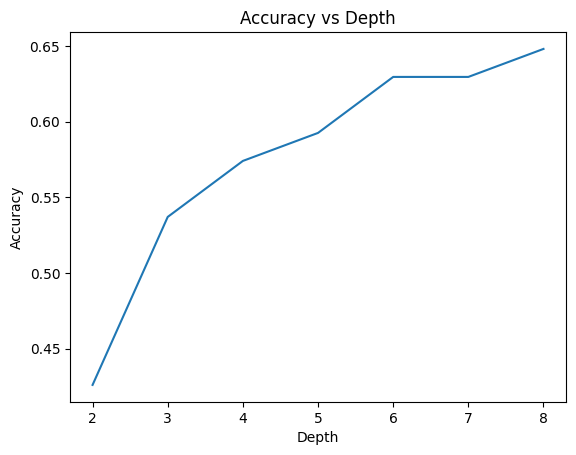

In [23]:
accuracy=np.array(accuracy)
depth=np.arange(2,9)
plt.plot(depth,accuracy)
plt.title('Accuracy vs Depth')
plt.xlabel('Depth')
plt.ylabel('Accuracy')

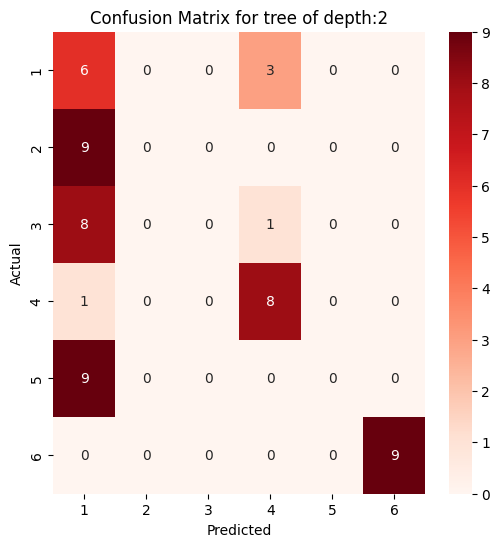

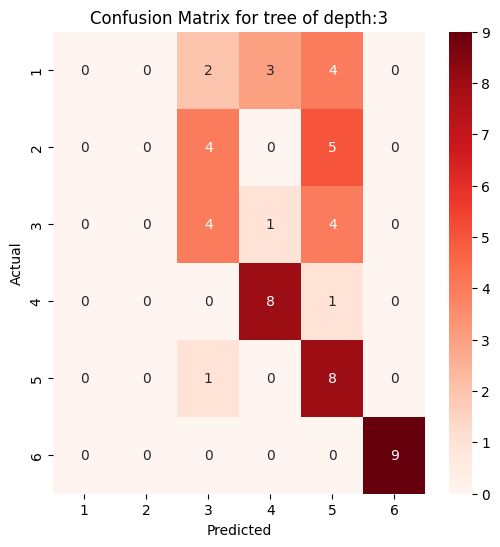

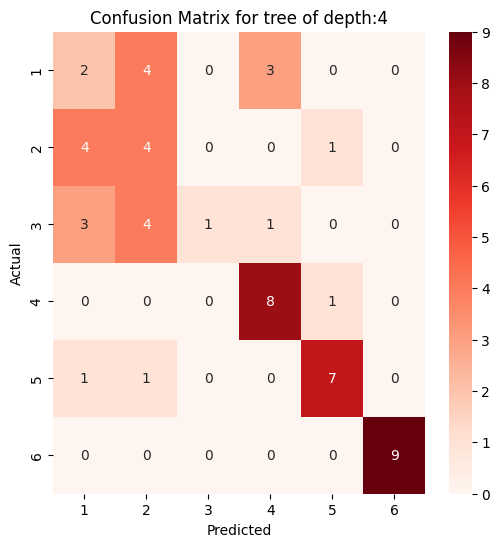

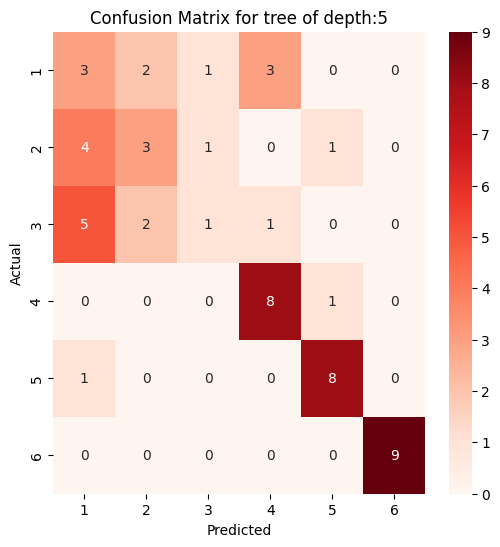

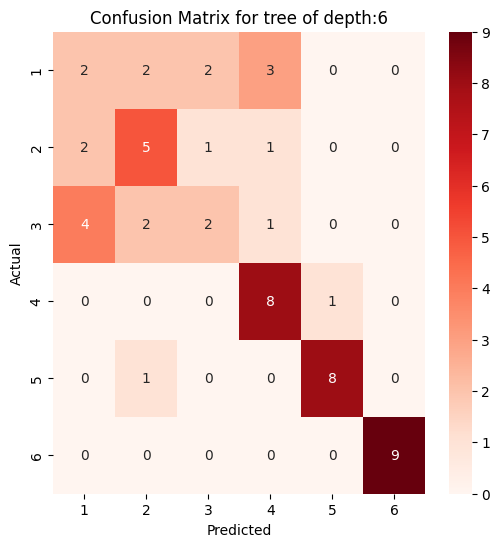

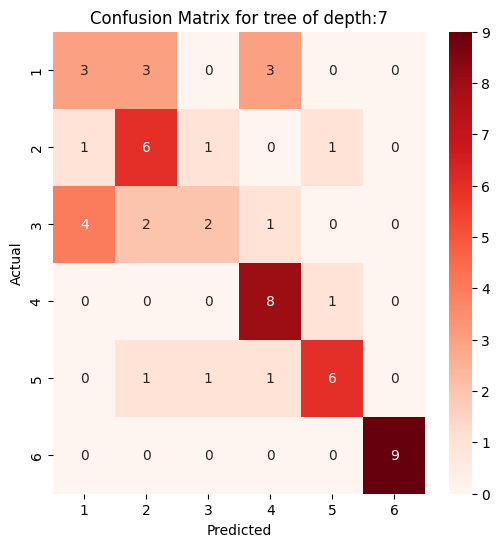

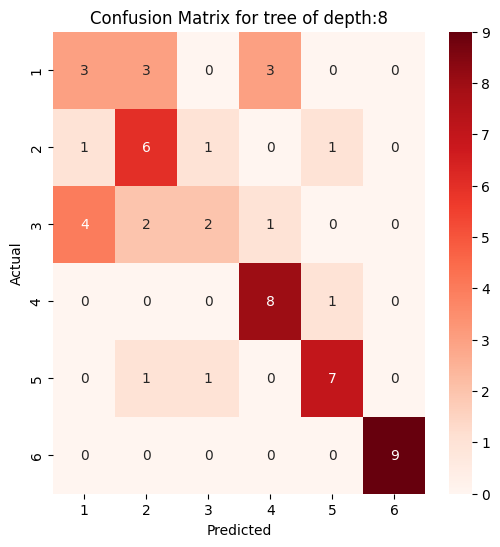

In [24]:
for i in range(0,7):
    cm = confusion_matrix(y_test,y_pred[i])
    plt.figure(figsize=(6,6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Reds", xticklabels=range(1, 7), yticklabels=range(1, 7))
    plt.title('Confusion Matrix for tree of depth:'+str(i+2))
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

## Approach-2: Using Linear acceleration from X_train

In [25]:
linear_acc_train = X_train[:,:,0]**2 + X_train[:,:,1]**2 + X_train[:,:,2]**2
linear_acc_test = X_test[:,:,0]**2 + X_test[:,:,1]**2 + X_test[:,:,2]**2

print(f"linear_acc_train: {linear_acc_train.shape}")
print(f"linear_acc_test: {linear_acc_test.shape}")
print(f"y_train: {y_train.shape}")
print(f"y_test: {y_test.shape}")

linear_acc_train: (126, 500)
linear_acc_test: (54, 500)
y_train: (126,)
y_test: (54,)


In [26]:
y_pred=[]
accuracy=[]
for i in range(2,9):
    dt=DecisionTreeClassifier(max_depth=i,random_state=0)
    dt.fit(linear_acc_train,y_train)
    yp=dt.predict(linear_acc_test)
    y_pred.append(yp)
    accuracy.append(sklearn.metrics.accuracy_score(y_test, yp))

Text(0, 0.5, 'Accuracy')

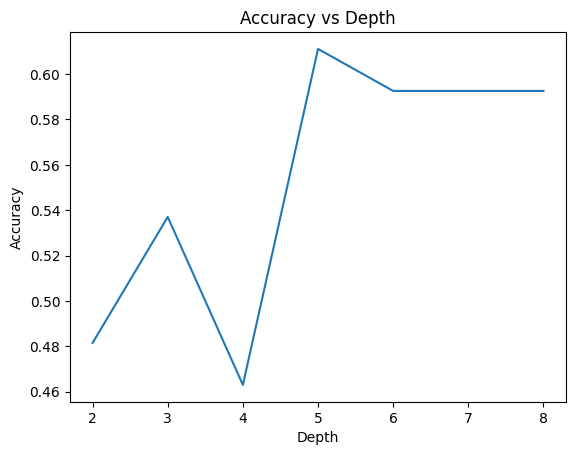

In [27]:
accuracy=np.array(accuracy)
depth=np.arange(2,9)
plt.plot(depth,accuracy)
plt.title('Accuracy vs Depth')
plt.xlabel('Depth')
plt.ylabel('Accuracy')

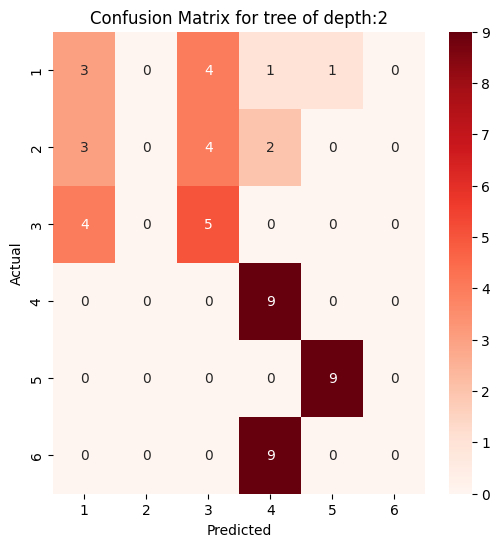

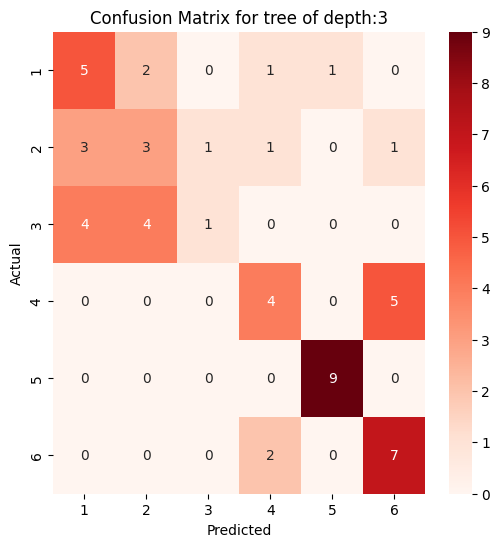

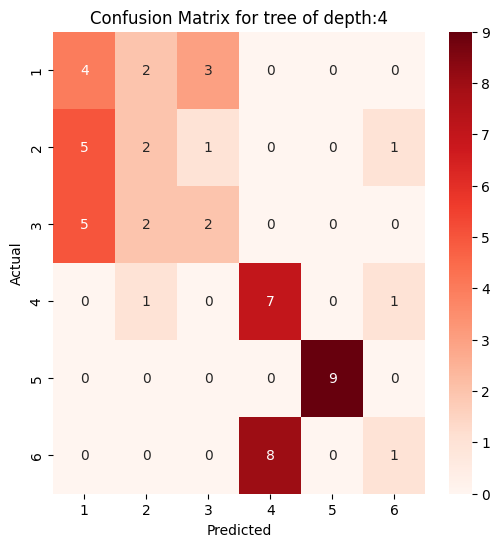

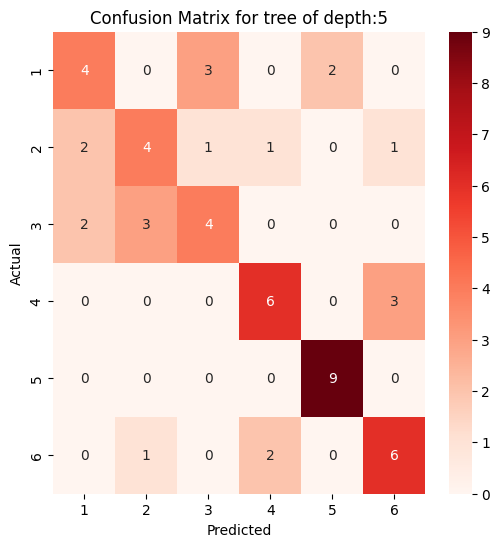

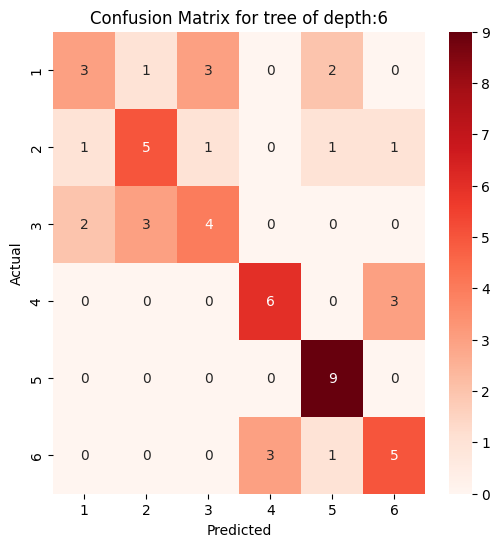

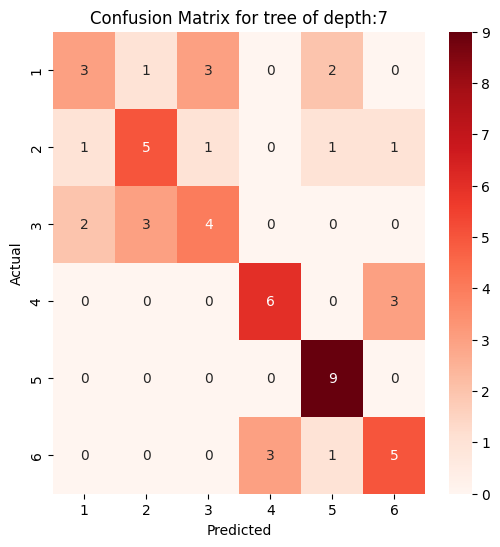

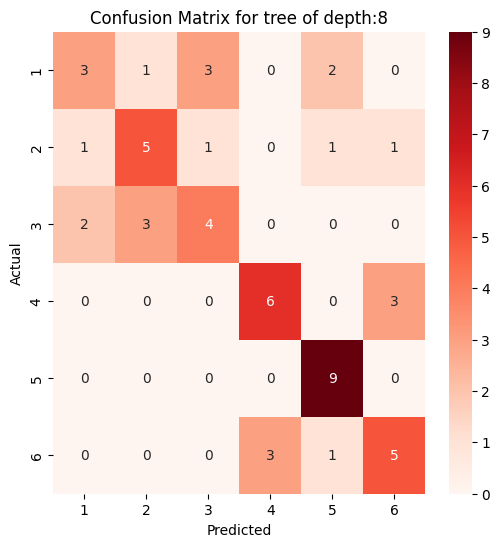

In [28]:
for i in range(0,7):
    cm = confusion_matrix(y_test,y_pred[i])
    plt.figure(figsize=(6,6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Reds", xticklabels=range(1, 7), yticklabels=range(1, 7))
    plt.title('Confusion Matrix for tree of depth:'+str(i+2))
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

# Question-2

In [29]:
import tsfel
# Extract features using TSFEL
cfg = tsfel.get_features_by_domain()  # Get all features by default
X_train_tsfel = tsfel.time_series_features_extractor(cfg,X_train, verbose=1,fs =50)
X_test_tsfel = tsfel.time_series_features_extractor(cfg,X_test, verbose=1,fs =50)

print(f"X_train_tsfel: {X_train_tsfel.shape}")
print(f"X_test_tsfel: {X_test_tsfel.shape}")
print(f"y_train: {y_train.shape}")
print(f"y_test: {y_test.shape}")

*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
X_train_tsfel: (126, 1152)
X_test_tsfel: (54, 1152)
y_train: (126,)
y_test: (54,)


In [30]:
y_tsfel_pred=[]
tsfel_accuracy=[]
for i in range(2,9):
    dt=DecisionTreeClassifier(max_depth=i,random_state=0)
    dt.fit(X_train_tsfel,y_train)
    yp=dt.predict(X_test_tsfel)
    y_tsfel_pred.append(yp)
    tsfel_accuracy.append(sklearn.metrics.accuracy_score(y_test, yp))

Text(0, 0.5, 'Accuracy')

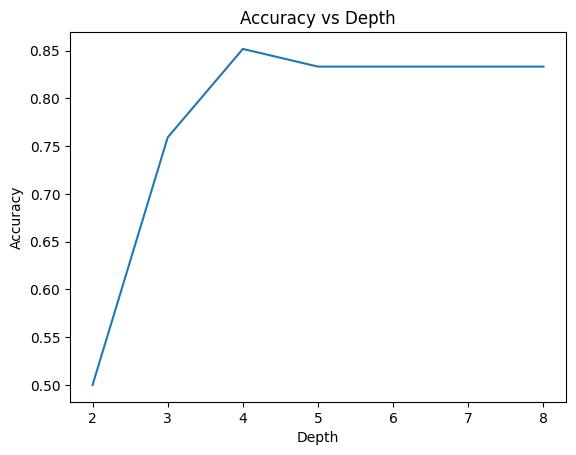

In [31]:
accuracy=np.array(tsfel_accuracy)
depth=np.arange(2,9)
plt.plot(depth,tsfel_accuracy)
plt.title('Accuracy vs Depth')
plt.xlabel('Depth')
plt.ylabel('Accuracy')

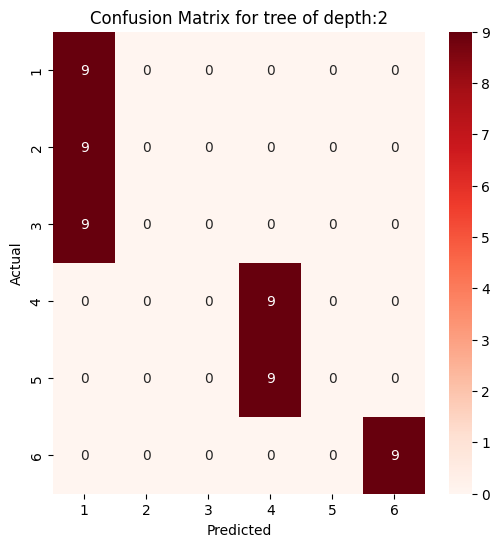

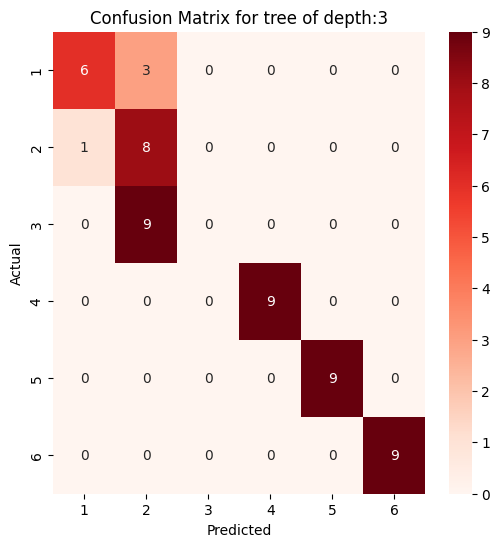

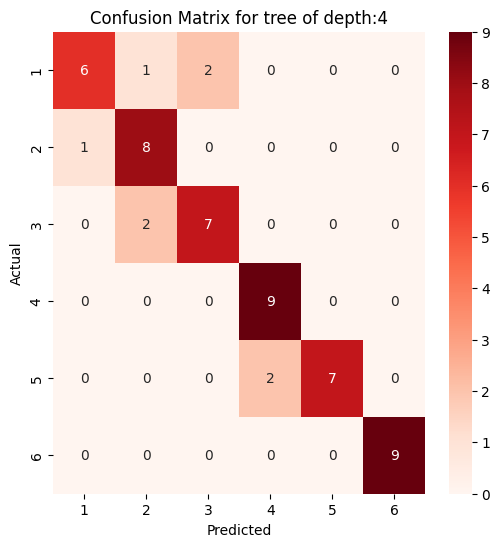

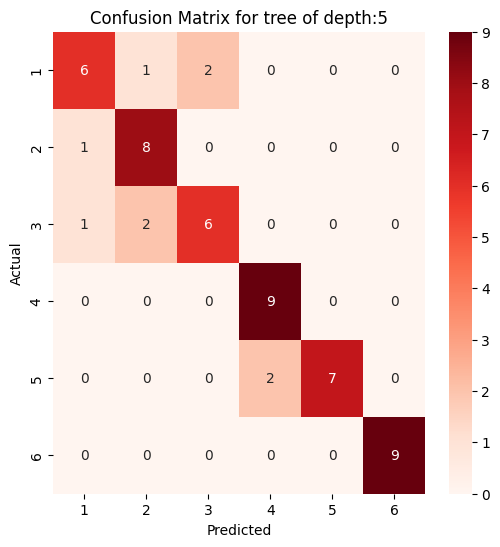

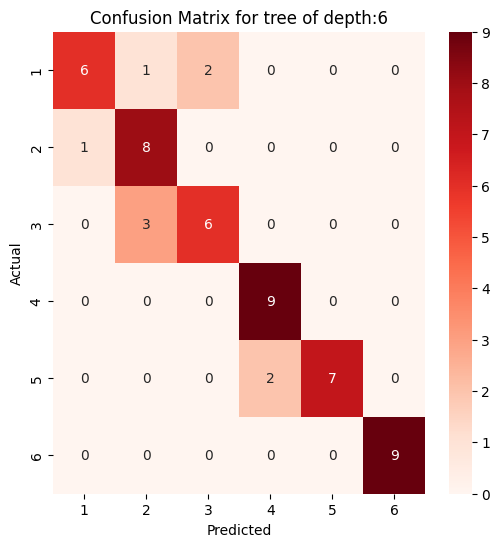

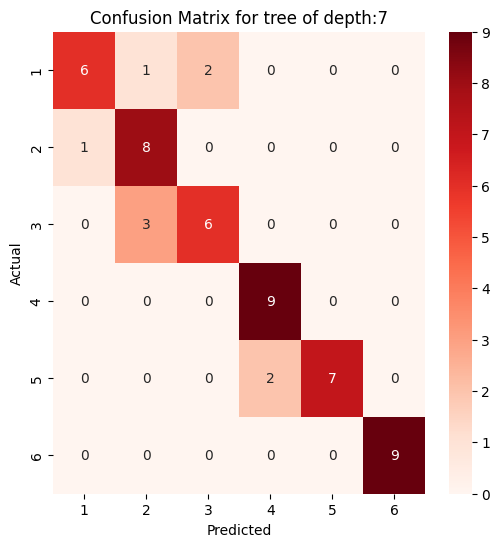

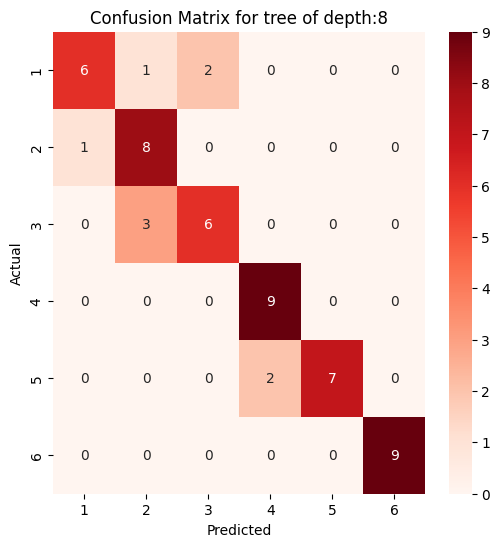

In [32]:
for i in range(0,7):
    cm = confusion_matrix(y_test,y_tsfel_pred[i])
    plt.figure(figsize=(6,6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Reds", xticklabels=range(1, 7), yticklabels=range(1, 7))
    plt.title('Confusion Matrix for tree of depth:'+str(i+2))
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

# Question-3

In [33]:
X_train = np.load('../SavedDataset/direct/UCI_X_train.npy')
y_train = np.load('../SavedDataset/direct/UCI_y_train.npy')

X_test = np.load('../SavedDataset/direct/UCI_X_test.npy')
y_test = np.load('../SavedDataset/direct/UCI_y_test.npy')

print(f"X_train: {X_train.shape}")
print(f"X_test: {X_test.shape}")
print(f"y_train: {y_train.shape}")
print(f"y_test: {y_test.shape}")

X_train: (7352, 561)
X_test: (2947, 561)
y_train: (7352, 1)
y_test: (2947, 1)


In [34]:
y_pred=[]
accuracy=[]
for i in range(2,9):
    dt=DecisionTreeClassifier(max_depth=i,random_state=0)
    dt.fit(X_train,y_train)
    yp=dt.predict(X_test)
    y_pred.append(yp)
    accuracy.append(sklearn.metrics.accuracy_score(y_test, yp))

Text(0, 0.5, 'Accuracy')

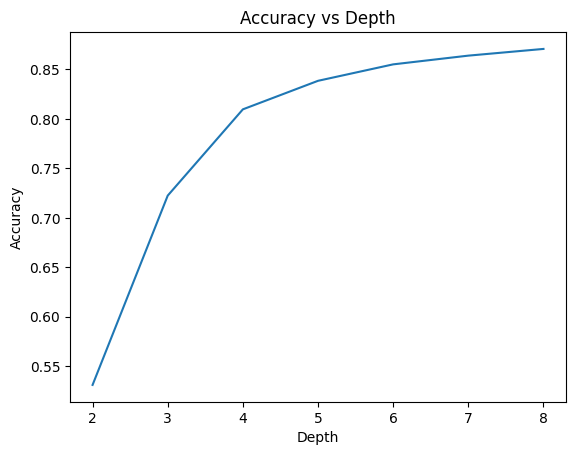

In [35]:
accuracy=np.array(accuracy)
depth=np.arange(2,9)
plt.plot(depth,accuracy)
plt.title('Accuracy vs Depth')
plt.xlabel('Depth')
plt.ylabel('Accuracy')

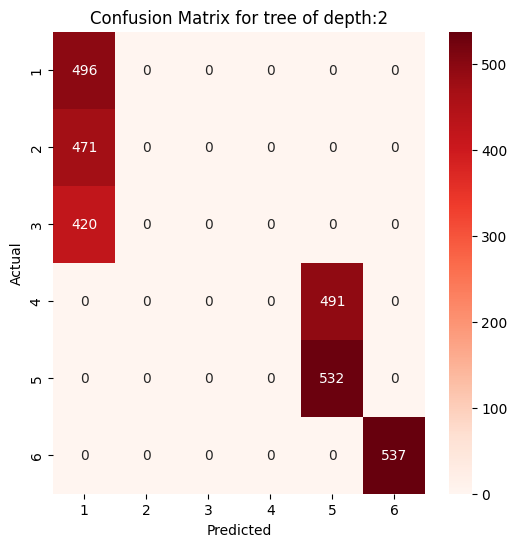

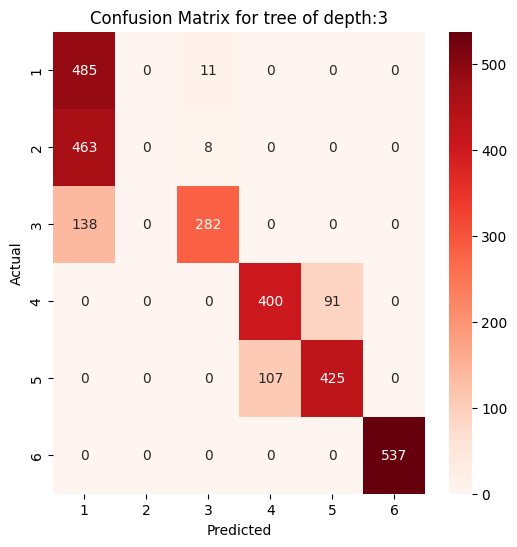

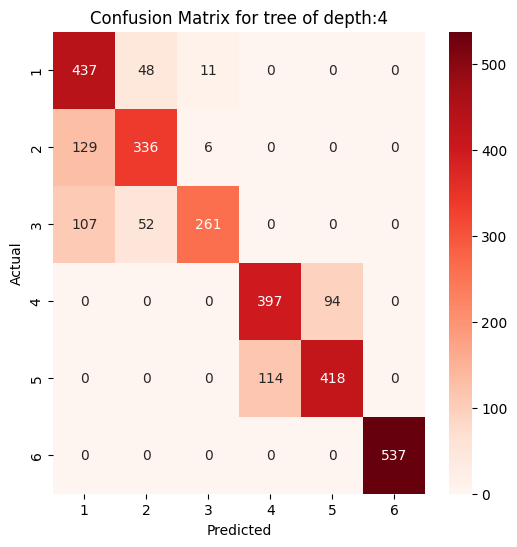

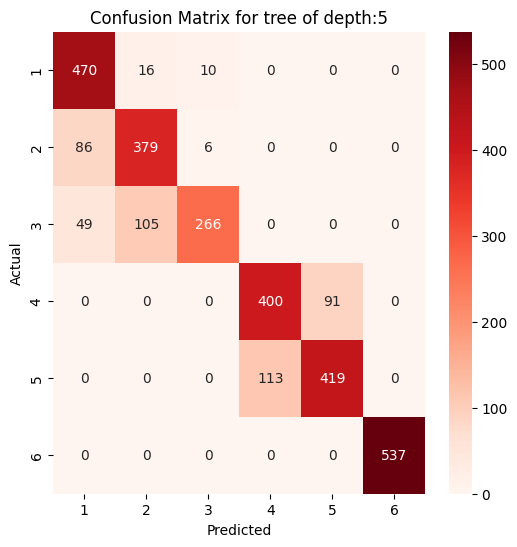

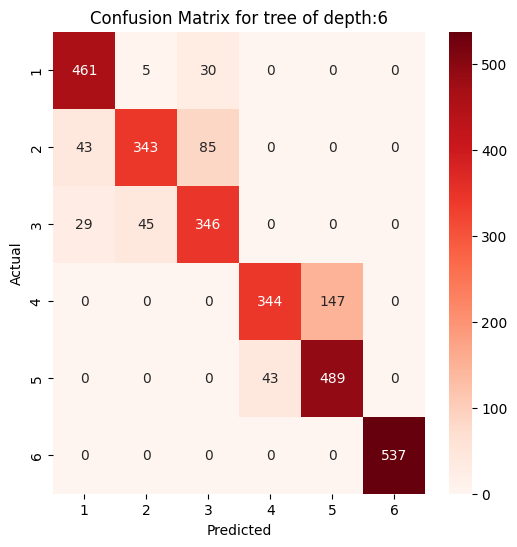

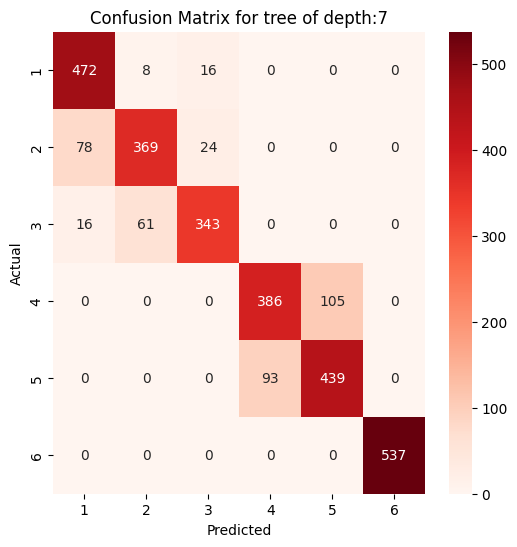

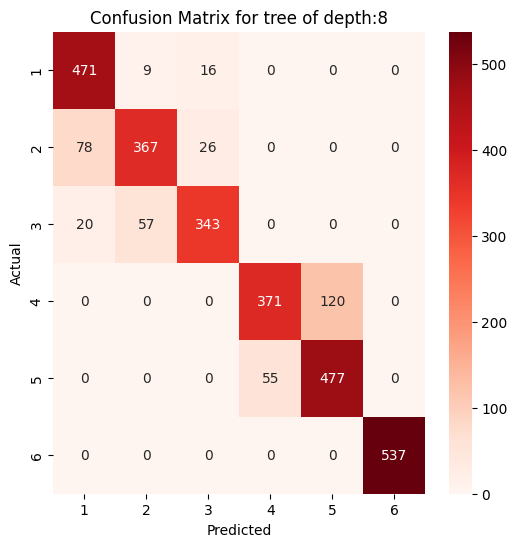

In [36]:
for i in range(0,7):
    cm = confusion_matrix(y_test,y_pred[i])
    plt.figure(figsize=(6,6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Reds", xticklabels=range(1, 7), yticklabels=range(1, 7))
    plt.title('Confusion Matrix for tree of depth:'+str(i+2))
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()